# COVID19 - Visualizing Its impact on Different Countries

This is for Visualizing the Pandemic Situations in different Countries

In [1]:
#Importing the Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
#Reading Data rom the Dataset
df = pd.read_csv('current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv')

In [3]:
df.head()

,daterep,day,month,year,cases,deaths,countriesandterritories,geoid,countryterritorycode,popdata2018
0,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
1,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8905 entries, 0 to 8904
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daterep                  8905 non-null   object 
 1   day                      8905 non-null   int64  
 2   month                    8905 non-null   int64  
 3   year                     8905 non-null   int64  
 4   cases                    8905 non-null   int64  
 5   deaths                   8905 non-null   int64  
 6   countriesandterritories  8905 non-null   object 
 7   geoid                    8883 non-null   object 
 8   countryterritorycode     8824 non-null   object 
 9   popdata2018              8873 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 695.8+ KB


In [5]:
df.describe()

,day,month,year,cases,deaths,popdata2018
count,8905.000000,8905.000000,8905.000000,8905.000000,8905.000000,8.873000e+03
mean,16.131948,2.495677,2019.992476,131.909264,7.231892,6.549505e+07
std,9.464349,1.272422,0.086418,1041.737090,62.844102,2.037894e+08
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,1.000000e+03
25%,7.000000,2.000000,2020.000000,0.000000,0.000000,3.731000e+06
50%,17.000000,3.000000,2020.000000,0.000000,0.000000,1.062570e+07
75%,24.000000,3.000000,2020.000000,10.000000,0.000000,4.449450e+07
max,31.000000,12.000000,2020.000000,34272.000000,2004.000000,1.392730e+09


In [6]:
df.isnull().sum()

daterep                     0
day                         0
month                       0
year                        0
cases                       0
deaths                      0
countriesandterritories     0
geoid                      22
countryterritorycode       81
popdata2018                32
dtype: int64

The Columns with some null values are of no such good to us in plotting Data

The only useful Columns are: daterep, cases,deaths

Now, we will rename the columns so that they are a bit more descriptive

In [7]:
df.rename(columns=({"daterep":"Date","day":"Day","month":"Month","year":"Year","cases":"New Cases","deaths":"New Deaths","countriesandterritories":"Country","geoid":"Geoid","countryterritorycode":"Country Code","popdata2018":"Population(2018)"}),inplace=True)

In [8]:
df

,Date,Day,Month,Year,New Cases,New Deaths,Country,Geoid,Country Code,Population(2018)
0,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
1,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
8900,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8901,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
8902,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8903,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [9]:
df

,Date,Day,Month,Year,New Cases,New Deaths,Country,Geoid,Country Code,Population(2018)
0,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
1,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
8900,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8901,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
8902,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8903,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [10]:
#Sorting the Table by Country and the by Date
df.sort_values(by=['Country','Date'],inplace=True)

In [11]:
df

,Date,Day,Month,Year,New Cases,New Deaths,Country,Geoid,Country Code,Population(2018)
86,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,37172386.0
85,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
84,2020-01-02,2,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
83,2020-01-03,3,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
82,2020-01-04,4,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
8893,2020-04-01,1,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0
8892,2020-04-02,2,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8891,2020-04-03,3,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8890,2020-04-04,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [12]:
#Resetting Index Values
df.reset_index(inplace = True)

In [13]:
df

,index,Date,Day,Month,Year,New Cases,New Deaths,Country,Geoid,Country Code,Population(2018)
0,86,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,37172386.0
1,85,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
2,84,2020-01-02,2,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,83,2020-01-03,3,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
4,82,2020-01-04,4,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...,...
8900,8893,2020-04-01,1,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0
8901,8892,2020-04-02,2,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8902,8891,2020-04-03,3,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8903,8890,2020-04-04,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [14]:
#Dropping the extra index Column
df.drop(columns='index',inplace = True)

In [15]:
#Creating 2 new Columns that tell us the Total Number of Cases and Deaths till each Date
df['Total Cases'] = [0 for x in df.index]
df['Total Deaths'] = [0 for x in df.index]

In [16]:
#All the values in the "Total Cases" Column are now set to Zero.
#Updating the values of the Column "Total Cases" to get the total number of Cases till each date for each country.

for i in df.loc[1:].index:
    if df.loc[i,'Country']==df.loc[i-1,'Country']:
        df.loc[i,'Total Cases'] = df.loc[i,'New Cases'] + df.loc[i-1,'Total Cases']
    else:
        df.loc[i,'Total Cases'] = df.loc[i,'New Cases']

In [17]:
df

,Date,Day,Month,Year,New Cases,New Deaths,Country,Geoid,Country Code,Population(2018),Total Cases,Total Deaths
0,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,37172386.0,0,0
1,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0
2,2020-01-02,2,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0
3,2020-01-03,3,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0
4,2020-01-04,4,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8900,2020-04-01,1,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,8,0
8901,2020-04-02,2,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,8,0
8902,2020-04-03,3,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,8,0
8903,2020-04-04,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,9,0


In [18]:
#Creating a Group to filter data on the basis of Country
CountryGroup = df.groupby('Country')
CountryGroup.get_group('India')

,Date,Day,Month,Year,New Cases,New Deaths,Country,Geoid,Country Code,Population(2018),Total Cases,Total Deaths
3730,2019-12-31,31,12,2019,0,0,India,IN,IND,1.352617e+09,0,0
3731,2020-01-01,1,1,2020,0,0,India,IN,IND,1.352617e+09,0,0
3732,2020-01-02,2,1,2020,0,0,India,IN,IND,1.352617e+09,0,0
3733,2020-01-03,3,1,2020,0,0,India,IN,IND,1.352617e+09,0,0
3734,2020-01-04,4,1,2020,0,0,India,IN,IND,1.352617e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3821,2020-04-01,1,4,2020,146,3,India,IN,IND,1.352617e+09,1397,0
3822,2020-04-02,2,4,2020,568,15,India,IN,IND,1.352617e+09,1965,0
3823,2020-04-03,3,4,2020,336,6,India,IN,IND,1.352617e+09,2301,0
3824,2020-04-04,4,4,2020,601,12,India,IN,IND,1.352617e+09,2902,0


In [19]:
#All the values in the "Total Deaths" Column are now set to Zero.
#Updating the values of the Column "Total Deaths" to get the total number of Deaths till each date for each country.

for i in df.loc[1:].index:
    if df.loc[i,'Country']==df.loc[i-1,'Country']:
        df.loc[i,'Total Deaths'] = df.loc[i,'New Deaths'] + df.loc[i-1,'Total Deaths']
    else:
        df.loc[i,'Total Deaths'] = df.loc[i,'New Deaths']

In [20]:
CountryGroup.get_group('India')

,Date,Day,Month,Year,New Cases,New Deaths,Country,Geoid,Country Code,Population(2018),Total Cases,Total Deaths
3730,2019-12-31,31,12,2019,0,0,India,IN,IND,1.352617e+09,0,0
3731,2020-01-01,1,1,2020,0,0,India,IN,IND,1.352617e+09,0,0
3732,2020-01-02,2,1,2020,0,0,India,IN,IND,1.352617e+09,0,0
3733,2020-01-03,3,1,2020,0,0,India,IN,IND,1.352617e+09,0,0
3734,2020-01-04,4,1,2020,0,0,India,IN,IND,1.352617e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3821,2020-04-01,1,4,2020,146,3,India,IN,IND,1.352617e+09,1397,35
3822,2020-04-02,2,4,2020,568,15,India,IN,IND,1.352617e+09,1965,50
3823,2020-04-03,3,4,2020,336,6,India,IN,IND,1.352617e+09,2301,56
3824,2020-04-04,4,4,2020,601,12,India,IN,IND,1.352617e+09,2902,68


In [21]:
df.describe()

,Day,Month,Year,New Cases,New Deaths,Population(2018),Total Cases,Total Deaths
count,8905.000000,8905.000000,8905.000000,8905.000000,8905.000000,8.873000e+03,8905.000000,8905.000000
mean,16.131948,2.495677,2019.992476,131.909264,7.231892,6.549505e+07,1659.982706,73.485570
std,9.464349,1.272422,0.086418,1041.737090,62.844102,2.037894e+08,11052.933331,622.146064
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,1.000000e+03,0.000000,0.000000
25%,7.000000,2.000000,2020.000000,0.000000,0.000000,3.731000e+06,0.000000,0.000000
50%,17.000000,3.000000,2020.000000,0.000000,0.000000,1.062570e+07,6.000000,0.000000
75%,24.000000,3.000000,2020.000000,10.000000,0.000000,4.449450e+07,93.000000,1.000000
max,31.000000,12.000000,2020.000000,34272.000000,2004.000000,1.392730e+09,312237.000000,15362.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8905 entries, 0 to 8904
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8905 non-null   object 
 1   Day               8905 non-null   int64  
 2   Month             8905 non-null   int64  
 3   Year              8905 non-null   int64  
 4   New Cases         8905 non-null   int64  
 5   New Deaths        8905 non-null   int64  
 6   Country           8905 non-null   object 
 7   Geoid             8883 non-null   object 
 8   Country Code      8824 non-null   object 
 9   Population(2018)  8873 non-null   float64
 10  Total Cases       8905 non-null   int64  
 11  Total Deaths      8905 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 835.0+ KB


In [23]:
#Converting the datatyp eof Date Column to DateTime
df['Date'] = pd.to_datetime(df['Date'])

## Visualizing New Cases/Deaths in various Countries

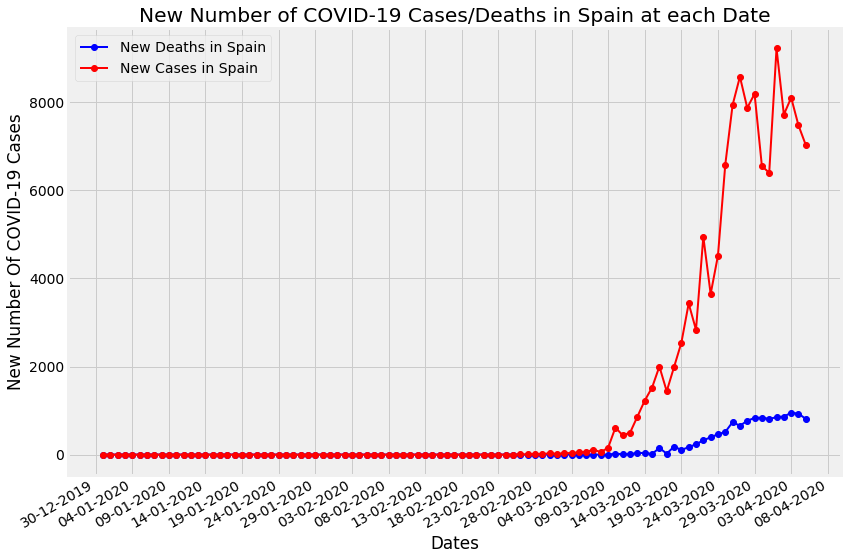

In [24]:
##New Cases/Deaths in Spain.png

#Setting Properties of the Curve
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#What to Plot:
plt.plot_date(CountryGroup.get_group('Spain')['Date'],CountryGroup.get_group('Spain')['New Deaths'],color='b',linestyle='solid',linewidth=2,label='New Deaths in Spain')
plt.plot_date(CountryGroup.get_group('Spain')['Date'],CountryGroup.get_group('Spain')['New Cases'],color='r',linestyle='solid',linewidth=2,label='New Cases in Spain')

#Setting Labels and Title
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',color='k')
plt.ylabel('New Number Of COVID-19 Cases',color='k')
plt.title('New Number of COVID-19 Cases/Deaths in Spain at each Date',color='k')

#Changing the Date Format and setting Intervals for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

#Plotting and Saving the Curve
plt.legend()
plt.tight_layout()
plt.savefig('New Cases or Deaths\Spain')
plt.show()

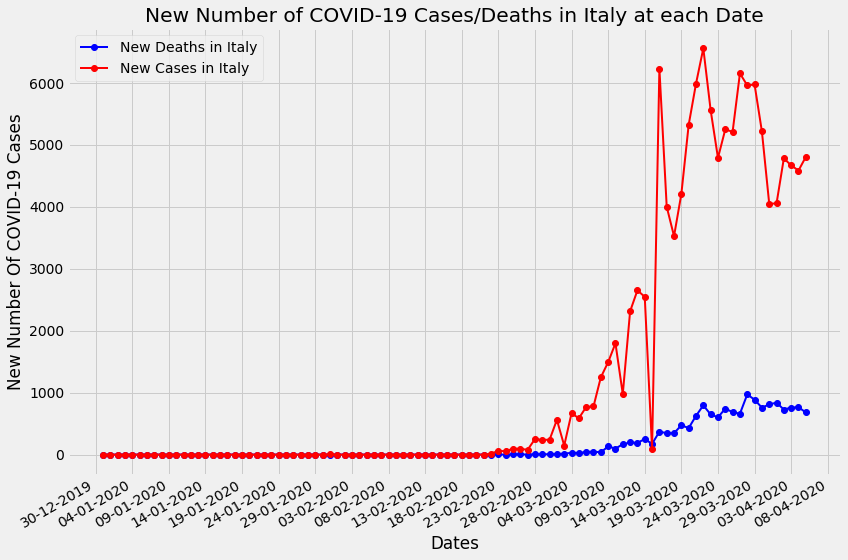

In [25]:
#New Cases/Deaths in Italy.png

#Setting Properties of the Curve
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#What to Plot:
plt.plot_date(CountryGroup.get_group('Italy')['Date'],CountryGroup.get_group('Italy')['New Deaths'],color='b',linestyle='solid',linewidth=2,label='New Deaths in Italy')
plt.plot_date(CountryGroup.get_group('Italy')['Date'],CountryGroup.get_group('Italy')['New Cases'],color='r',linestyle='solid',linewidth=2,label='New Cases in Italy')

#Setting Labels and Title
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',color='k')
plt.ylabel('New Number Of COVID-19 Cases',color='k')
plt.title('New Number of COVID-19 Cases/Deaths in Italy at each Date',color='k')

#Changing the Date Format and setting Intervals for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

#Plotting and Saving the Curve
plt.legend()
plt.tight_layout()
plt.savefig('New Cases or Deaths\Italy')
plt.show()

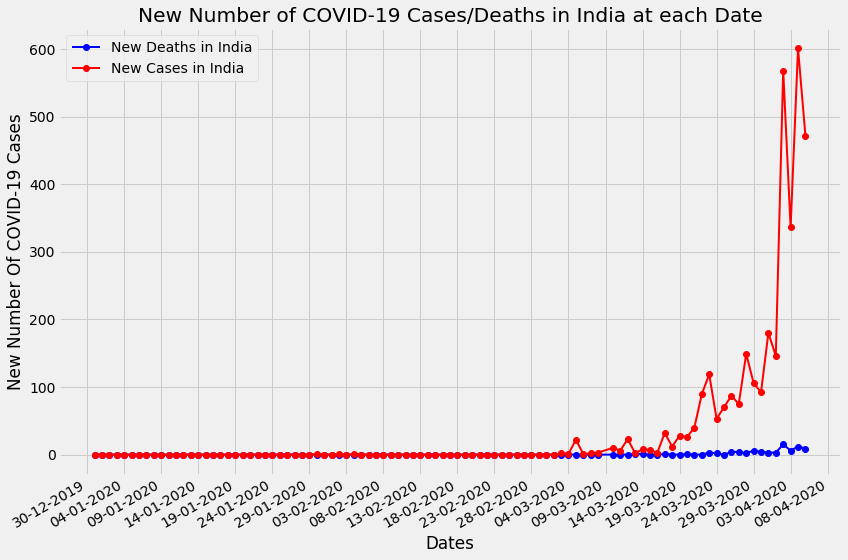

In [26]:
#New Cases/Deaths in India.png

#Setting Properties of the Curve
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#What to Plot:
plt.plot_date(CountryGroup.get_group('India')['Date'],CountryGroup.get_group('India')['New Deaths'],color='b',linestyle='solid',linewidth=2,label='New Deaths in India')
plt.plot_date(CountryGroup.get_group('India')['Date'],CountryGroup.get_group('India')['New Cases'],color='r',linestyle='solid',linewidth=2,label='New Cases in India')

#Setting Labels and Title
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',color='k')
plt.ylabel('New Number Of COVID-19 Cases',color='k')
plt.title('New Number of COVID-19 Cases/Deaths in India at each Date',color='k')

#Changing the Date Format and setting Intervals for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

#Plotting and Saving the Curve
plt.legend()
plt.tight_layout()
plt.savefig('New Cases or Deaths\India')
plt.show()

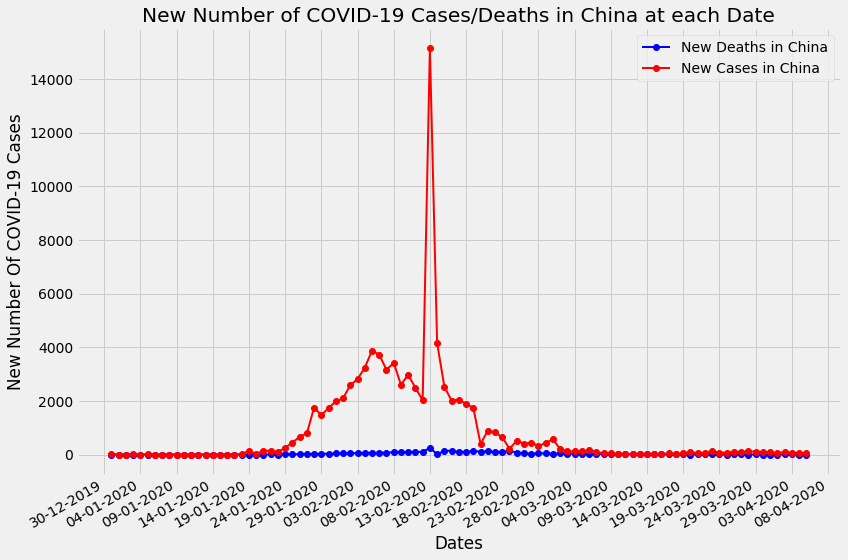

In [27]:
#New Cases/Deaths in China.png

#Setting Properties of the Curve
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#What to Plot:
plt.plot_date(CountryGroup.get_group('China')['Date'],CountryGroup.get_group('China')['New Deaths'],color='b',linestyle='solid',linewidth=2,label='New Deaths in China')
plt.plot_date(CountryGroup.get_group('China')['Date'],CountryGroup.get_group('China')['New Cases'],color='r',linestyle='solid',linewidth=2,label='New Cases in China')

#Setting Labels and Title
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',color='k')
plt.ylabel('New Number Of COVID-19 Cases',color='k')
plt.title('New Number of COVID-19 Cases/Deaths in China at each Date',color='k')

#Changing the Date Format and setting Intervals for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

#Plotting and Saving the Curve
plt.legend()
plt.tight_layout()
plt.savefig('New Cases or Deaths\China')
plt.show()

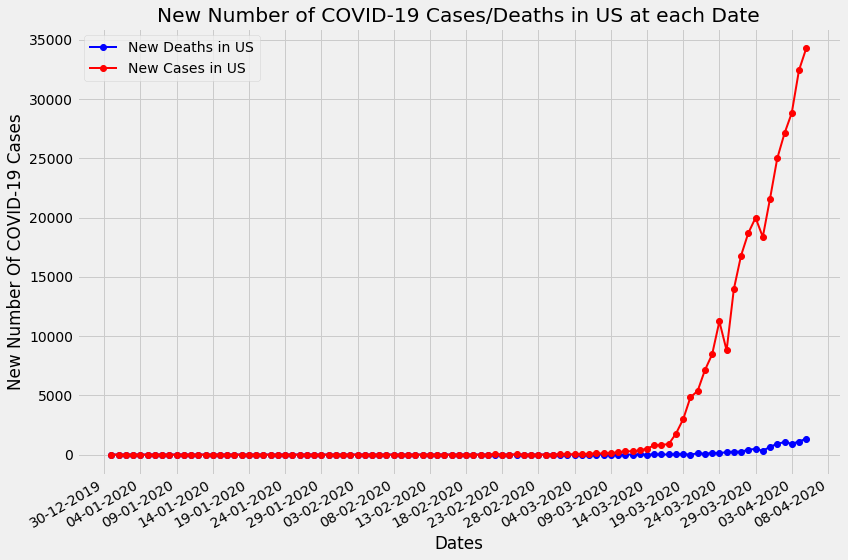

In [28]:
#New Cases/Deaths in US.png

#Setting Properties of the Curve
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#What to Plot:
plt.plot_date(CountryGroup.get_group('United_States_of_America')['Date'],CountryGroup.get_group('United_States_of_America')['New Deaths'],color='b',linestyle='solid',linewidth=2,label='New Deaths in US')
plt.plot_date(CountryGroup.get_group('United_States_of_America')['Date'],CountryGroup.get_group('United_States_of_America')['New Cases'],color='r',linestyle='solid',linewidth=2,label='New Cases in US')

#Setting Labels and Title
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',color='k')
plt.ylabel('New Number Of COVID-19 Cases',color='k')
plt.title('New Number of COVID-19 Cases/Deaths in US at each Date',color='k')

#Changing the Date Format and setting Intervals for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

#Plotting and Saving the Curve
plt.legend()
plt.tight_layout()
plt.savefig('New Cases or Deaths\America')
plt.show()

# Data Visualization

## Visualizing Total Cases/Deaths in various Countries

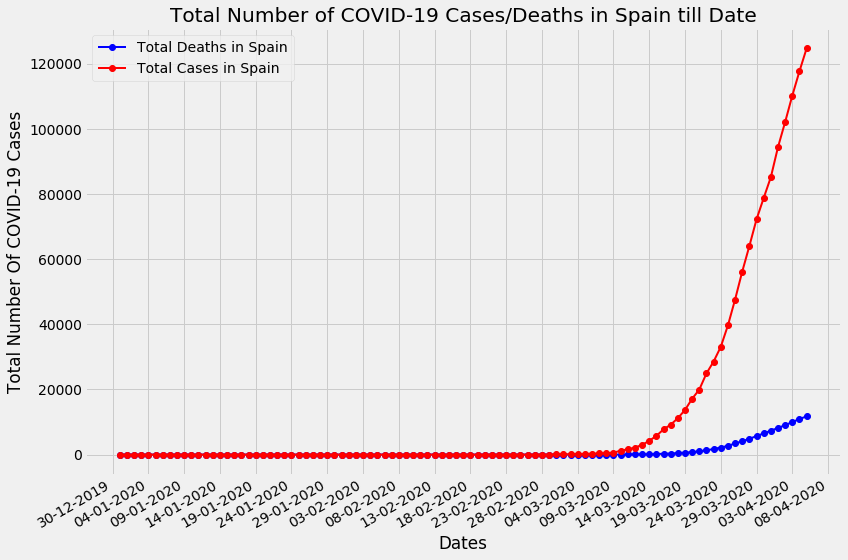

In [29]:
#Total Cases/Deaths in Spain.png

#Setting Properties of the Curve
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#What to Plot:
plt.plot_date(CountryGroup.get_group('Spain')['Date'],CountryGroup.get_group('Spain')['Total Deaths'],color='b',linestyle='solid',linewidth=2,label='Total Deaths in Spain')
plt.plot_date(CountryGroup.get_group('Spain')['Date'],CountryGroup.get_group('Spain')['Total Cases'],color='r',linestyle='solid',linewidth=2,label='Total Cases in Spain')

#Setting Labels and Title
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',color='k')
plt.ylabel('Total Number Of COVID-19 Cases',color='k')
plt.title('Total Number of COVID-19 Cases/Deaths in Spain till Date',color='k')

#Changing the Date Format and setting Intervals for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

#Plotting and Saving the Curve
plt.legend()
plt.tight_layout()
plt.savefig('Total Cases or Deaths\Spain')
plt.show()

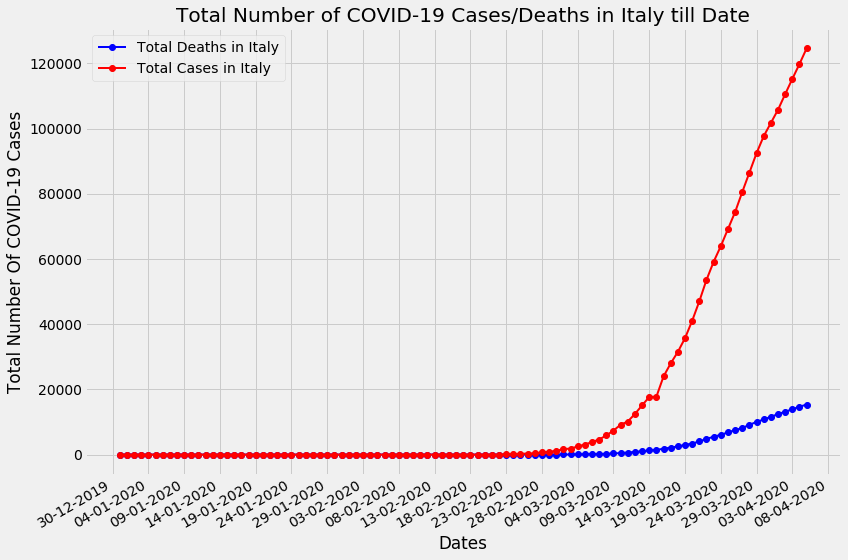

In [30]:
#Total Cases/Deaths in Italy.png

#Setting Properties of the Curve
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#What to Plot:
plt.plot_date(CountryGroup.get_group('Italy')['Date'],CountryGroup.get_group('Italy')['Total Deaths'],color='b',linestyle='solid',linewidth=2,label='Total Deaths in Italy')
plt.plot_date(CountryGroup.get_group('Italy')['Date'],CountryGroup.get_group('Italy')['Total Cases'],color='r',linestyle='solid',linewidth=2,label='Total Cases in Italy')

#Setting Labels and Title
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',color='k')
plt.ylabel('Total Number Of COVID-19 Cases',color='k')
plt.title('Total Number of COVID-19 Cases/Deaths in Italy till Date',color='k')

#Changing the Date Format and setting Intervals for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

#Plotting and Saving the Curve
plt.legend()
plt.tight_layout()
plt.savefig('Total Cases or Deaths\Italy')
plt.show()

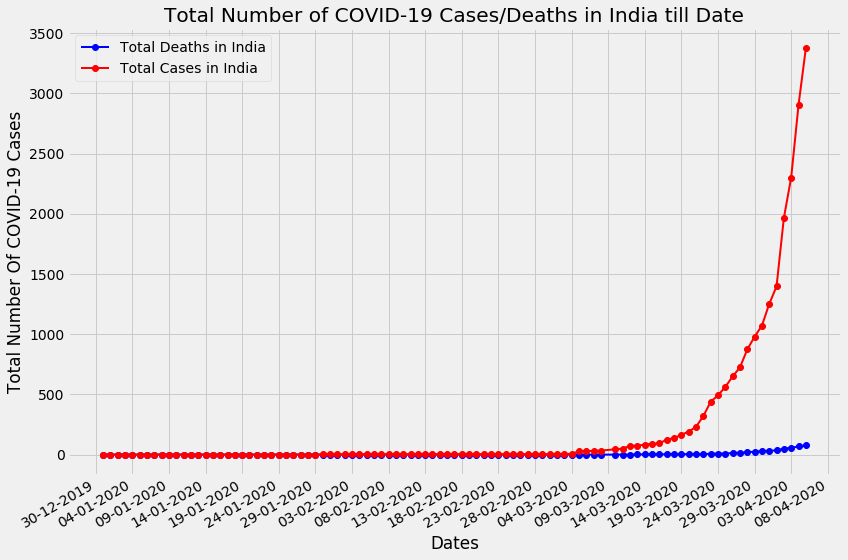

In [31]:
#Total Cases/Deaths in India.png

#Setting Properties of the Curve
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#What to Plot:
plt.plot_date(CountryGroup.get_group('India')['Date'],CountryGroup.get_group('India')['Total Deaths'],color='b',linestyle='solid',linewidth=2,label='Total Deaths in India')
plt.plot_date(CountryGroup.get_group('India')['Date'],CountryGroup.get_group('India')['Total Cases'],color='r',linestyle='solid',linewidth=2,label='Total Cases in India')

#Setting Labels and Title
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',color='k')
plt.ylabel('Total Number Of COVID-19 Cases',color='k')
plt.title('Total Number of COVID-19 Cases/Deaths in India till Date',color='k')

#Changing the Date Format and setting Intervals for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

#Plotting and Saving the Curve
plt.legend()
plt.tight_layout()
plt.savefig('Total Cases or Deaths\India')
plt.show()

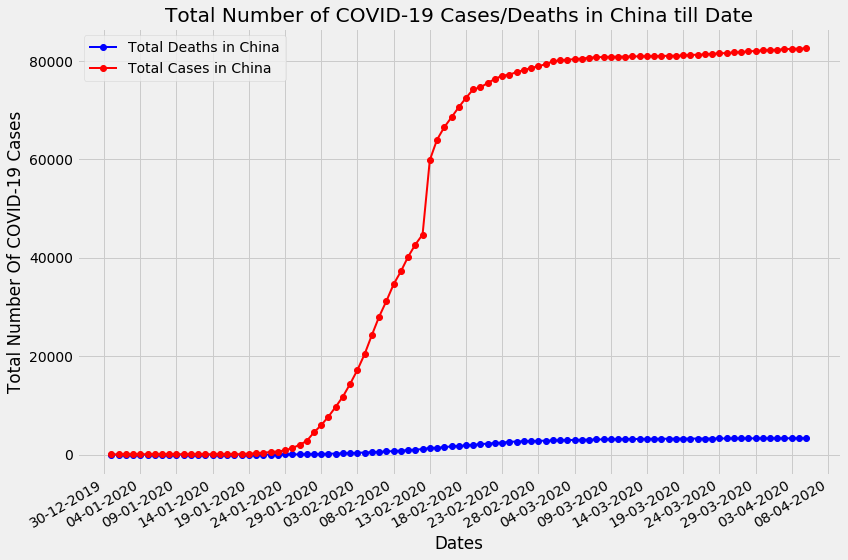

In [32]:
#Total Cases/Deaths in China.png

#Setting Properties of the Curve
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#What to Plot:
plt.plot_date(CountryGroup.get_group('China')['Date'],CountryGroup.get_group('China')['Total Deaths'],color='b',linestyle='solid',linewidth=2,label='Total Deaths in China')
plt.plot_date(CountryGroup.get_group('China')['Date'],CountryGroup.get_group('China')['Total Cases'],color='r',linestyle='solid',linewidth=2,label='Total Cases in China')

#Setting Labels and Title
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',color='k')
plt.ylabel('Total Number Of COVID-19 Cases',color='k')
plt.title('Total Number of COVID-19 Cases/Deaths in China till Date',color='k')

#Changing the Date Format and setting Intervals for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

#Plotting and Saving the Curve
plt.legend()
plt.tight_layout()
plt.savefig('Total Cases or Deaths\China')
plt.show()

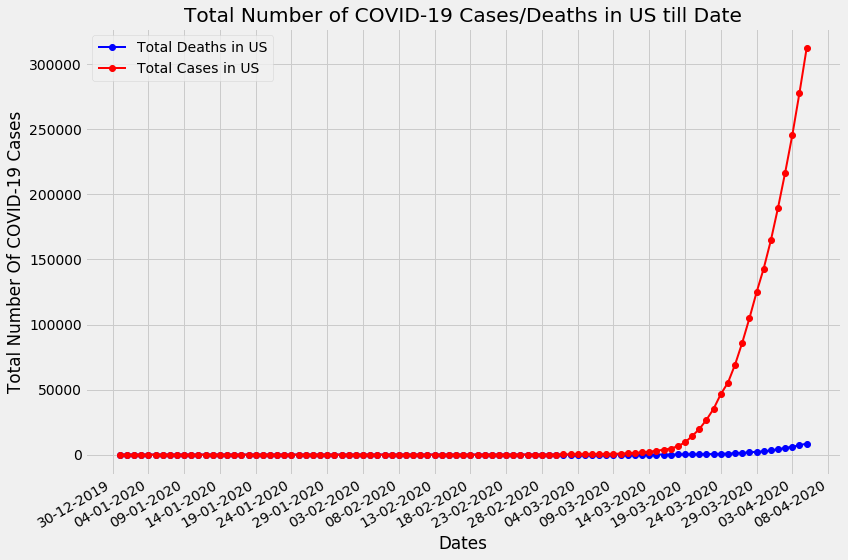

In [33]:
#Total Cases/Deaths in US.png

#Setting Properties of the Curve
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#What to Plot:
plt.plot_date(CountryGroup.get_group('United_States_of_America')['Date'],CountryGroup.get_group('United_States_of_America')['Total Deaths'],color='b',linestyle='solid',linewidth=2,label='Total Deaths in US')
plt.plot_date(CountryGroup.get_group('United_States_of_America')['Date'],CountryGroup.get_group('United_States_of_America')['Total Cases'],color='r',linestyle='solid',linewidth=2,label='Total Cases in US')

#Setting Labels and Title
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',color='k')
plt.ylabel('Total Number Of COVID-19 Cases',color='k')
plt.title('Total Number of COVID-19 Cases/Deaths in US till Date',color='k')

#Changing the Date Format and setting Intervals for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

#Plotting and Saving the Curve
plt.legend()
plt.tight_layout()
plt.savefig('Total Cases or Deaths\America')
plt.show()

## Thank You